# About the Dataset
The dataset consists of  details about the movies and tv shows such as the title, director, and cast of the shows / movies. Details such as the release year

To begin our analysis, we will start by loading the dataset and creating new features. This kernel focuses on exploring a particular dataset and extracting valuable insights and findings. 


In [249]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the Data set

In [250]:
#loading the data set
df=pd.read_csv('netflix_titles.csv')
display(df)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Dataset Preparation

In [251]:
df.shape

(8807, 12)

In [252]:
#print the name of the columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [253]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [254]:
column_datatypes = df.dtypes
print(column_datatypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [255]:
#check the duplicate values
df.duplicated().sum()


0

In [256]:
#df = df.dropna()
df.shape

(8807, 12)

In [257]:
#find the count of type
counts = df['type'].value_counts()
count_of_type = counts['Movie']
print(count_of_type)

6131


In [258]:
display(df)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Exploring data 

### 1. Finding the percentage distribution of the 'type'

<Axes: ylabel='count'>

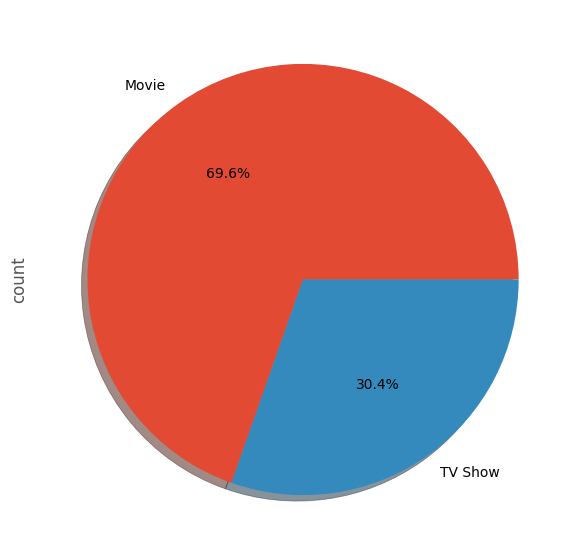

In [259]:
plt.figure(figsize=(14,7))
df["type"].value_counts().plot(kind="pie",shadow=True,autopct = '%1.1f%%')

### So from the above visualization we can see that netflix has more movies than TV shows till the last updated date. It has 67.2% movies and 30.4% TV shows.

## 2.Growth of content over years

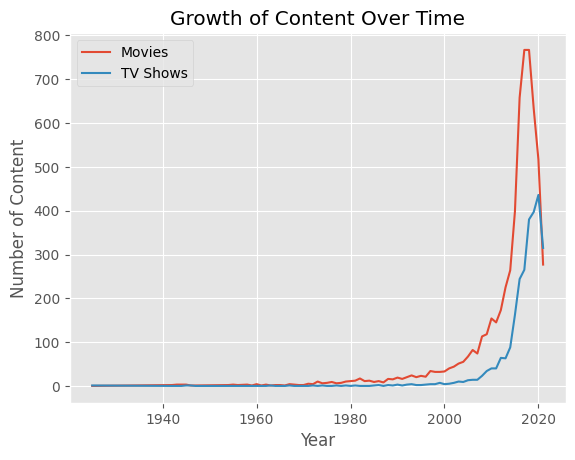

In [260]:
data = df[['release_year', 'type']]

# Group the data by 'release_year' and 'type' and calculate the count of content
growth_data = data.groupby(['release_year', 'type']).size().unstack().fillna(0)


plt.plot(growth_data.index, growth_data['Movie'], label='Movies')
plt.plot(growth_data.index, growth_data['TV Show'], label='TV Shows')
plt.xlabel('Year')
plt.ylabel('Number of Content')
plt.title('Growth of Content Over Time')
plt.legend()
plt.show()
#In this code, the relevant columns 'release_year' and 'type' are extracted from the dataset. Then, the data is grouped by 'release_year' and 'type', and the count of content is calculated for each year. The resulting counts are then plotted using a line chart, with separate lines for movies and TV shows.


### From the above visualization it clear that there is an increasse in the growth of content from the year 2000 to the last updated 

###  3.Finding the top 20 countries in terms of maximum number of movies on netflix

Text(0.5, 1.0, 'Top 20 countries in terms of maximum number of movies on Netflix')

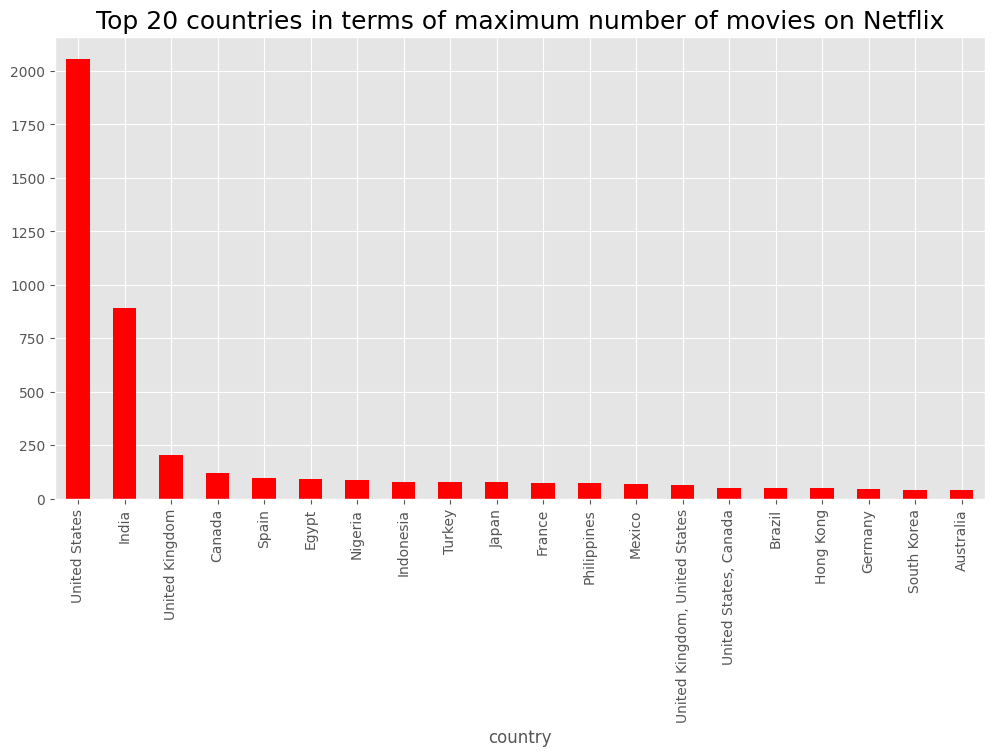

In [261]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["country"].value_counts()[:20].plot(kind="bar",color="r")
plt.title("Top 20 countries in terms of maximum number of movies on Netflix",size=18)


### From the above plot its clear that united states has the maximum number of movies in netflix followed by India in 2nd place and the least is Thailand. 

## 4.Finding top 20 countries in terms of maximum number TV shows on Netflix

Text(0.5, 1.0, 'Top 20 countries in terms of maximum number of TV shows on Netflix')

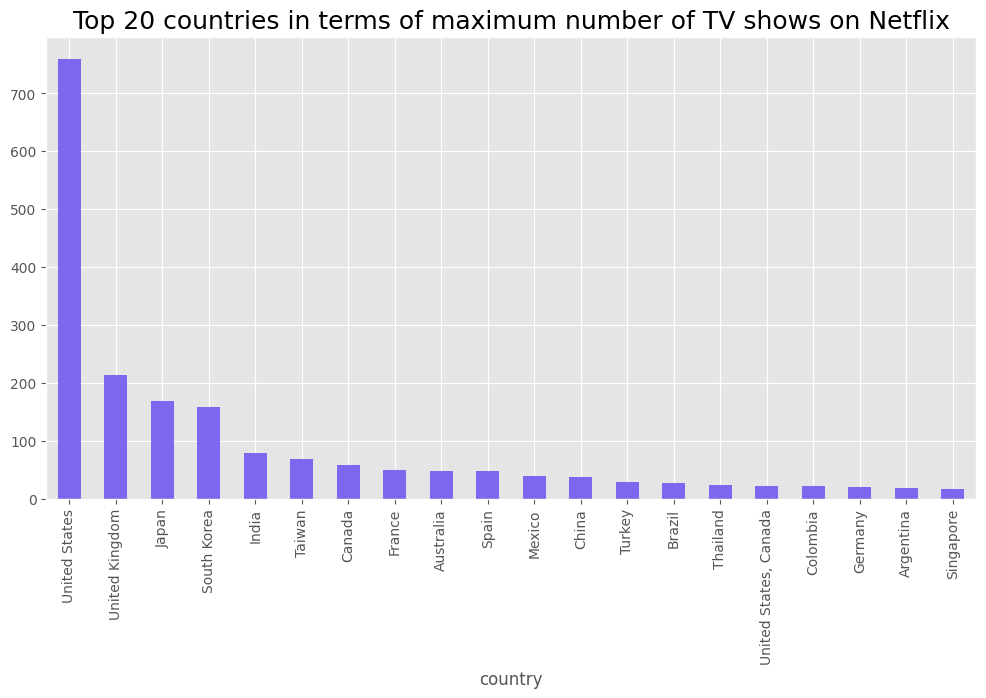

In [262]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["country"].value_counts()[:20].plot(kind="bar",color="mediumslateblue")
plt.title("Top 20 countries in terms of maximum number of TV shows on Netflix",size=18)

### From the above plot its clear that united states has the maximum number of V shows in Netflix followed by United Kingdom in 2nd place and the least is Colombia and Mexico.

##  5.Finding the maximun count of ratings

<Axes: xlabel='rating', ylabel='count'>

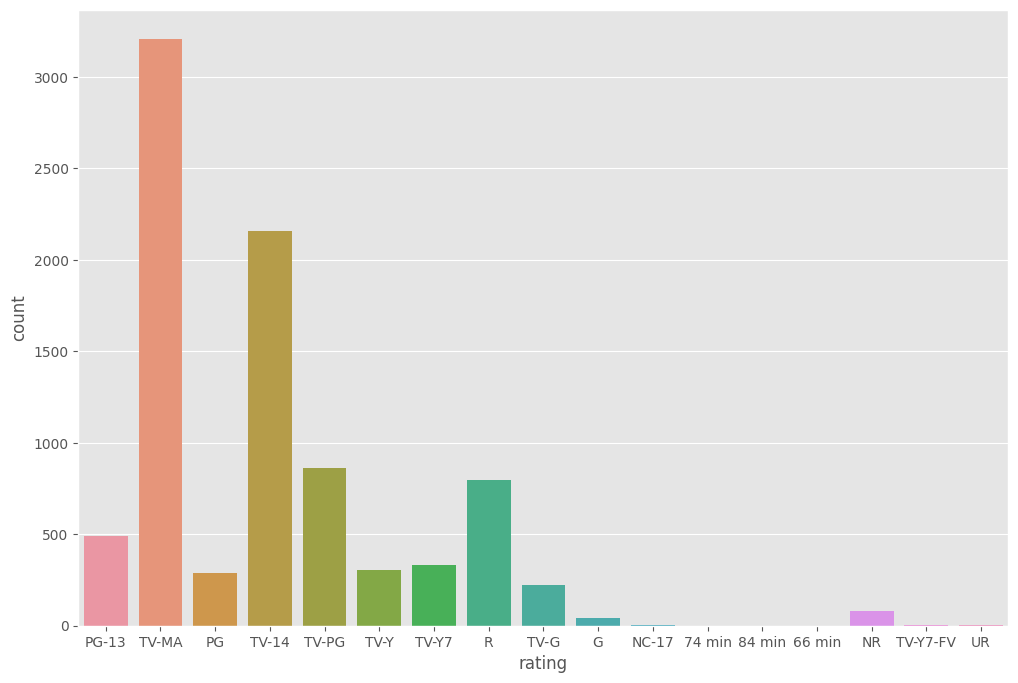

In [263]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df)

The dataset reveals that the highest count in the rating category is for TV-MA, which stands for "Mature Audience Only." This rating indicates that the content is designed for adult viewers and may not be suitable for children under 17. On the other hand, the least represented rating is NC-17.

##  6. Finding the relation between Type and Rating

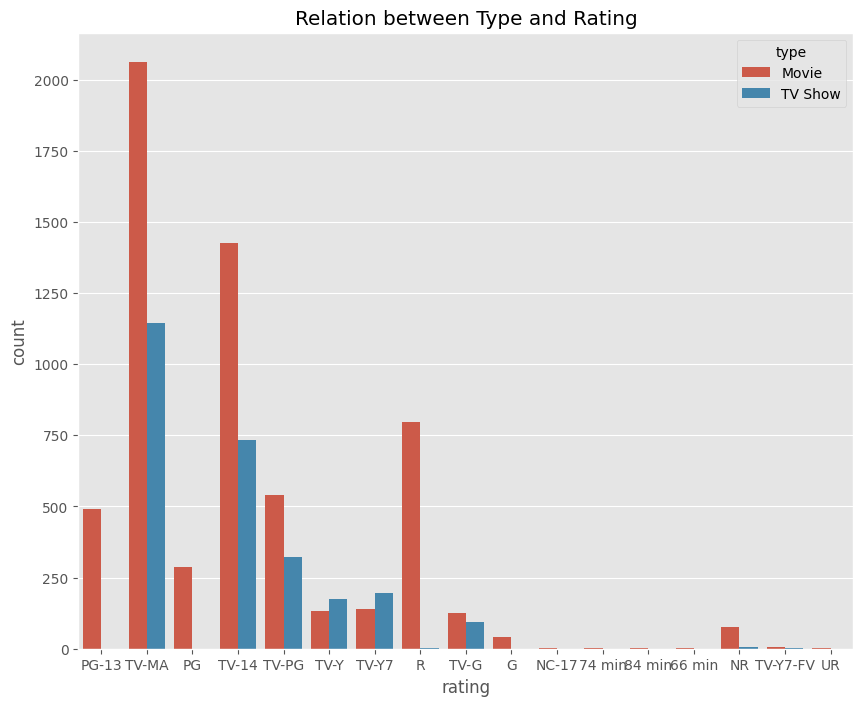

In [264]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df) #'hue' is used to visualize the data of different categories in one plot.
plt.title('Relation between Type and Rating')
plt.show()

### From the above observation its clear that TV-MA rated movies are maximum in count both in Movies and TV shows. 

##  7.Finding the percentage distribution of rating

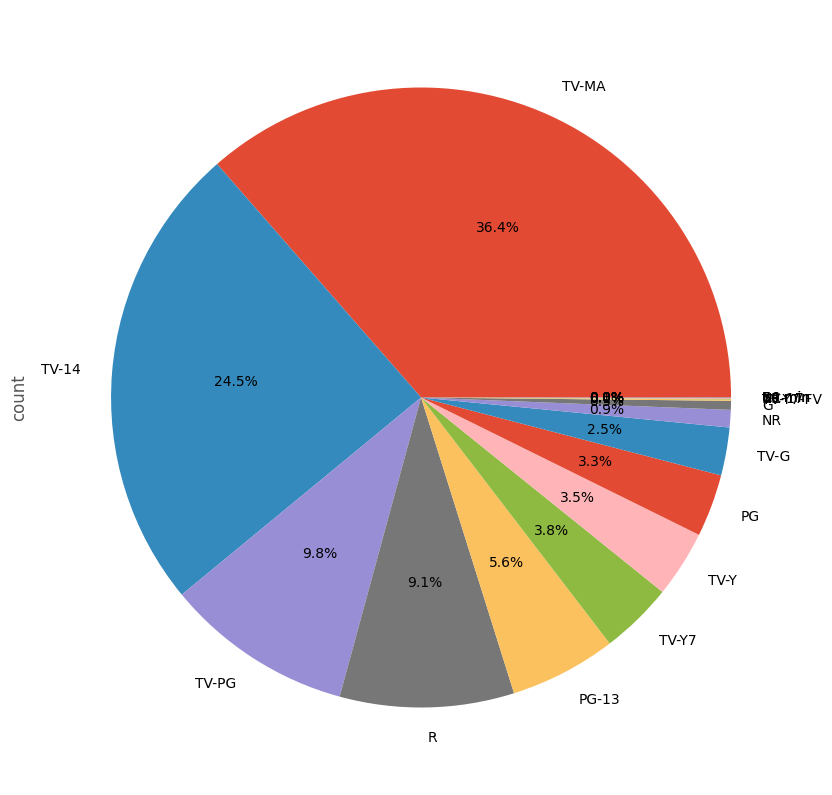

In [265]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,18)) #distribution according to the rating
plt.show()

### The dataset indicates that the TV-MA rating has the highest percentage among the available ratings.

In [266]:
# Finding the frequency count of each unique value in the 'country' column of the DataFrame df. 
df_countries = pd.DataFrame(df.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries.head(78)

,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
...,...,...
73,"Spain, France",5
74,Austria,5
75,"United States, Italy",5
76,"India, France",5


## 8.Distribution of content on basis of countries

In [267]:
import plotly.express as px
fig = px.choropleth(   
    locationmode='country names',
    locations=df_countries.country,
    labels=df_countries["count"]
)
fig.show()



### From the above map, we can observe that the areas that are colored blue represent countries where content, either movies or TV shows, is available. 

In [268]:
df = df.dropna()
df.shape

(5332, 12)

## 9.Wordcloud on country

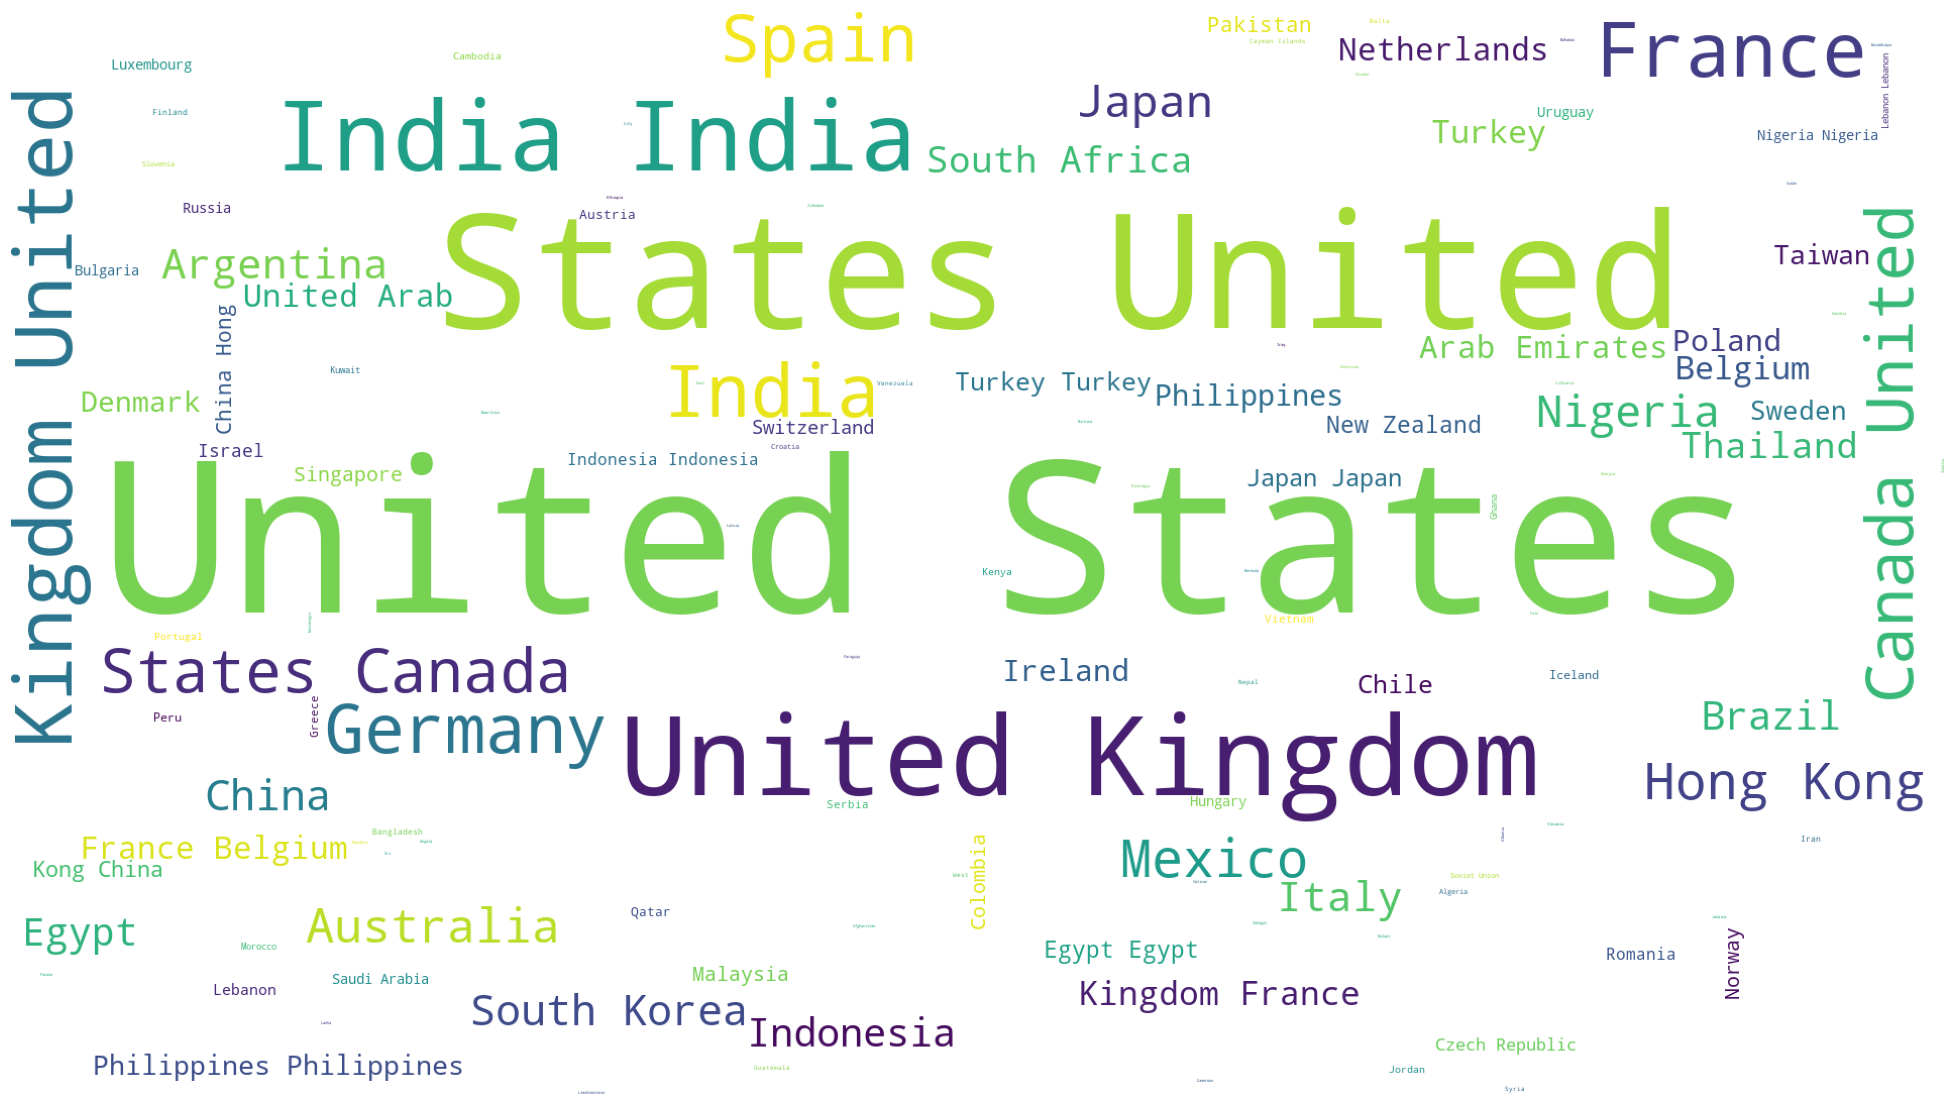

In [269]:
from wordcloud import WordCloud
df['country'] = df['country'].astype(str)
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()



### From the Wordchart it is clear that among all the countries United States has the highest contribution to netflix in both movies and TV shows


## 10.Wordcloud on cast

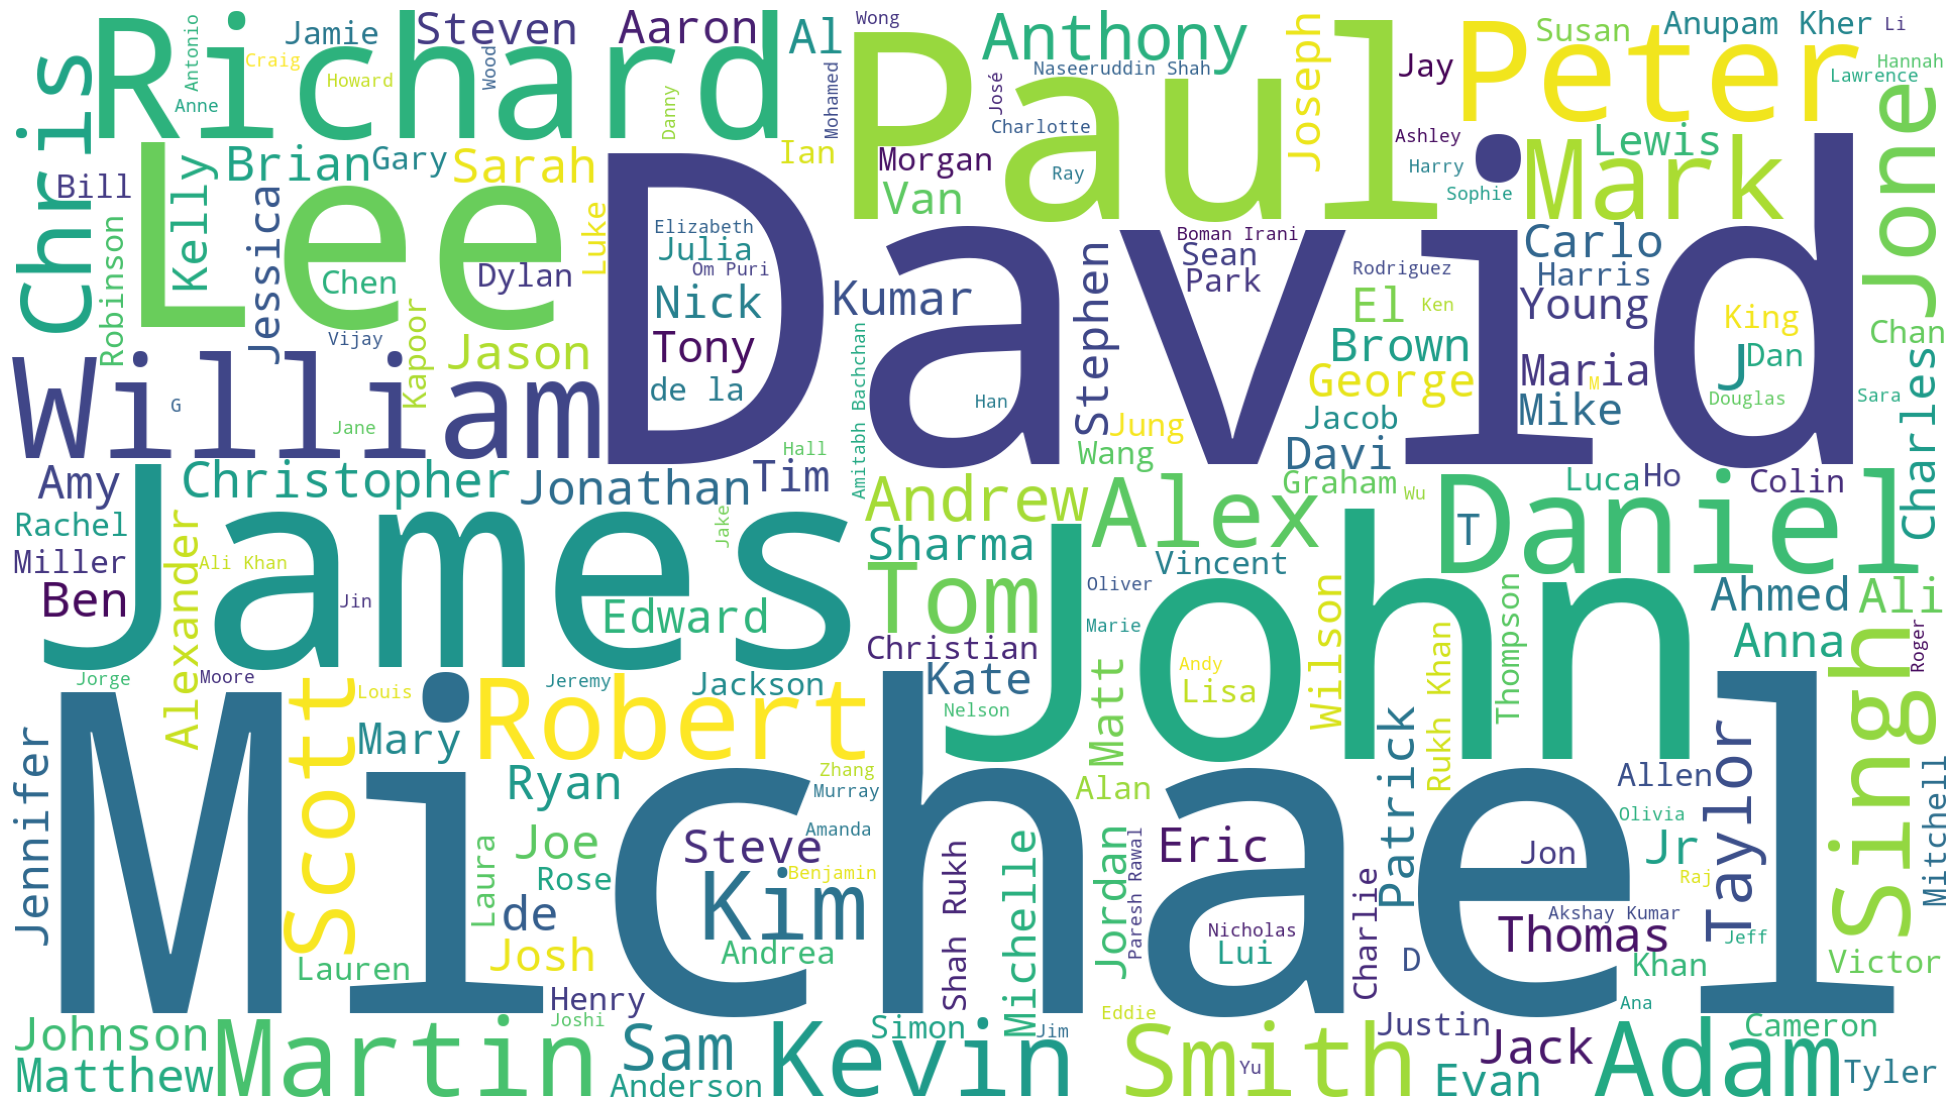

In [270]:
from wordcloud import WordCloud
df =df.dropna()
df['cast'] = df['cast'].astype(str)# due to the error of null values .....expected str instance, float found
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()


 ### From the Wordchart it is clear that among all the cast  Michael is most repeated in TV shows and Movies  which is followed by David 